In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./Casos_Diarios_Estado_Nacional_Confirmados.csv")
df

,cve_ent,poblacion,nombre,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,...,14-05-2023,15-05-2023,16-05-2023,17-05-2023,18-05-2023,19-05-2023,20-05-2023,21-05-2023,22-05-2023,23-05-2023
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,0,4,7,12,3,5,1,0,12,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,2,83,48,42,44,36,6,0,47,7
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,4,43,22,27,22,24,1,0,16,13
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,1,4,7,2,1,3,1,2,6,3
4,7,5730367,CHIAPAS,0,0,0,1,0,0,0,...,0,9,6,2,8,5,1,0,8,3
5,8,3801487,CHIHUAHUA,0,0,0,0,0,0,0,...,7,21,18,26,13,7,1,1,21,3
6,9,9018645,DISTRITO FEDERAL,0,2,0,0,0,0,1,...,59,316,240,263,204,205,54,55,246,87
7,5,3218720,COAHUILA,0,0,1,0,0,0,1,...,4,17,26,20,10,18,4,0,12,5
8,6,785153,COLIMA,0,0,0,0,0,0,0,...,3,21,13,9,16,2,2,6,17,9
9,10,1868996,DURANGO,0,0,0,0,0,0,0,...,2,12,11,1,3,6,2,3,7,3


##### Sumando de casos COVID-19 por fecha (columnas)

In [3]:
sumaColumnas = []

for column in df.columns[3:]:
    sumaColumnas.append(df[column].sum())

In [23]:
# Creando DataFrame con fecha y suma totañ de casos 
dfSumaColumn = pd.DataFrame([df.columns[3:], sumaColumnas]).T

#Renombrando el nombre de las columnas
dfSumaColumn.rename(columns={0: "Fecha", 1: "Total de casos de COVID-19"}, inplace = True)

dfSumaColumn.tail(5)

,Fecha,Total de casos de COVID-19
1178,19-05-2023,1872
1179,20-05-2023,558
1180,21-05-2023,454
1181,22-05-2023,2228
1182,23-05-2023,966


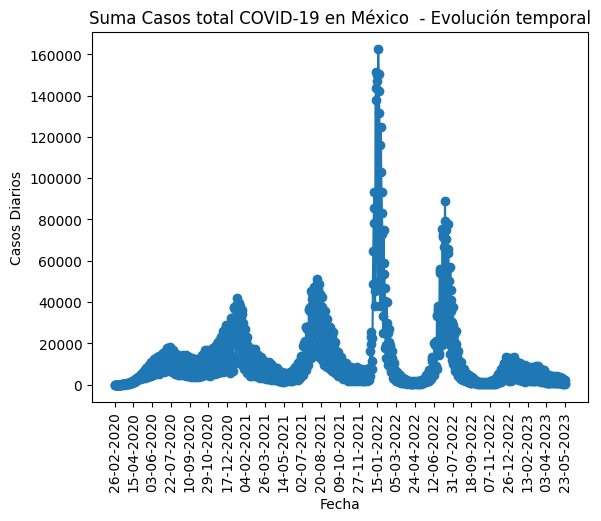

In [21]:
#Graficando casos totales
plt.plot(df.columns[3:], sumaColumnas, marker = 'o')
plt.xlabel('Fecha')
plt.ylabel('Casos Diarios')
plt.title('Suma Casos total COVID-19 en México  - Evolución temporal')

#Ajustando rango de fechas en la grafica
n = 25
x_indexes = np.linspace(0, len(df.columns[3:]) - 1, n, dtype = int)
x_labels = [df.columns[3:][i] for i in x_indexes]
plt.xticks(x_indexes, x_labels, rotation = 90)

plt.show()

##### Suma total de casos por Estado (filas)

In [25]:
sumaFilas = []

for i in range(1, len(df)):
    sumaFilas.append(df.iloc[i, 3:].sum())

In [31]:
dfSumaFilas = pd.DataFrame({df.columns[2]: df.iloc[1:, 2].values, 'Suma casos por Estado': sumaFilas})

dfSumaFilas.rename(columns={df.columns[2]: "Estado"}, inplace = True)

dfSumaFilas.head(6)

,Estado,Suma casos por Estado
0,BAJA CALIFORNIA,179528
1,BAJA CALIFORNIA SUR,130778
2,CAMPECHE,44434
3,CHIAPAS,58967
4,CHIHUAHUA,174526
5,DISTRITO FEDERAL,1897788


In [ ]:
#Graficando casos totales por Estado
plt.plot(df.columns[3:], sumaFilas, marker = 'o')
plt.xlabel('Fecha')
plt.ylabel('Casos Diarios')
plt.title('Suma Casos total COVID-19 en México  - Evolución temporal')

#Ajustando rango de fechas en la grafica
n = 25
x_indexes = np.linspace(0, len(df.columns[3:]) - 1, n, dtype = int)
x_labels = [df.columns[3:][i] for i in x_indexes]
plt.xticks(x_indexes, x_labels, rotation = 90)

plt.show()

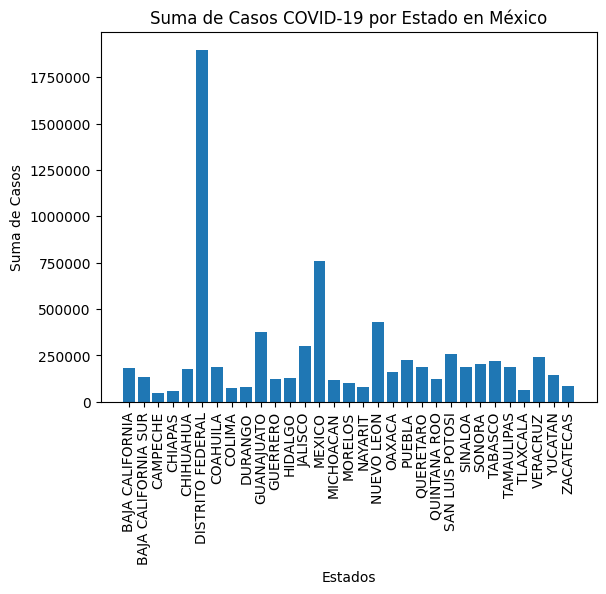

In [35]:
#Graficando
dfPlotFilas = dfSumaFilas[:-1]

estados = dfPlotFilas.iloc[:, 0]
sumaCasosEstado = dfPlotFilas.iloc[:, 1]

plt.bar(estados, sumaCasosEstado)
plt.xlabel('Estados')
plt.ylabel('Suma de Casos')
plt.title('Suma de Casos COVID-19 por Estado en México')

plt.xticks(rotation=90)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()